In [1]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')

# Preparing the data

In [2]:
import pandas as pd
ri=pd.read_csv('police.zip')
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [3]:
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
ri.shape

(91741, 15)

In [6]:
ri = ri.drop(['county_name', 'state'], axis='columns')

In [7]:
ri.shape

(91741, 13)

In [8]:
ri = ri.dropna(subset=['driver_gender'])

In [9]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [10]:
ri.shape

(86536, 13)

In [11]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [12]:
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [13]:
ri['is_arrested'] = ri.is_arrested.astype(bool)

In [14]:
ri['stop_datetime'] = pd.to_datetime(ri.stop_date.str.cat(ri.stop_time, sep=' '))
ri.stop_datetime.head()

0   2005-01-04 12:55:00
1   2005-01-23 23:15:00
2   2005-02-17 04:15:00
3   2005-02-20 17:15:00
4   2005-02-24 01:20:00
Name: stop_datetime, dtype: datetime64[ns]

In [15]:
ri = ri.set_index('stop_datetime')
print(ri.index)
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


# Exploring the relationship between gender and policing

## Does gender commit different violations?

In [16]:
female = ri[ri.driver_gender=='F']
male = ri[ri.driver_gender=='M']

In [17]:
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [18]:
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


> About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

## Does gender affect who gets a ticket for speeding?

In [19]:
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation=='Speeding')]
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation=='Speeding')]

In [20]:
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [21]:
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


> Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

## Does gender affect whose vehicle is searched?

In [22]:
print(ri.search_conducted.mean())

0.0382153092354627


> Great! It looks like the search rate is about 3.8%. Next, you'll examine whether the search rate varies by driver gender.

In [23]:
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


> Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

In [24]:
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [25]:
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


> Great work! For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

## Does gender affect who is frisked during a search?

In [26]:
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [27]:
ri.search_type.count()

3307

In [28]:
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

<Axes: >

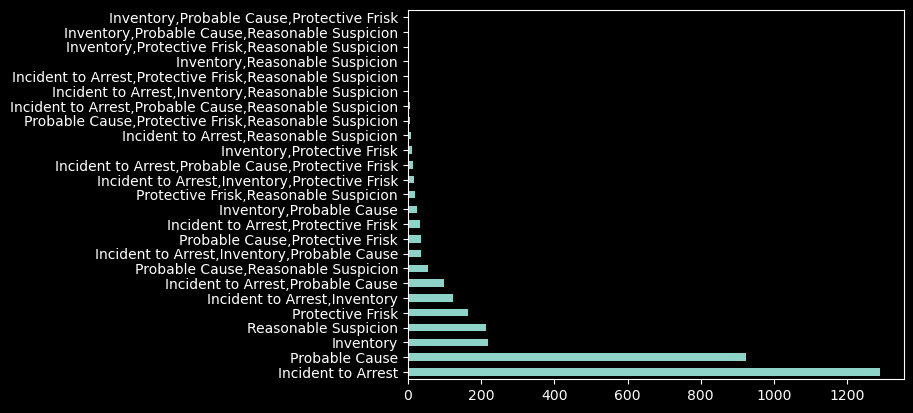

In [29]:
ri.search_type.value_counts().plot(kind='barh')

In [30]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)
print(ri.frisk.sum())

303


> Nice job! It looks like there were 303 drivers who were frisked. Next, you'll examine whether gender affects who is frisked.

In [31]:
searched = ri[ri.search_conducted]
searched.shape

(3307, 14)

In [32]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.09162382824312065


In [33]:
# Calculate the frisk rate for each gender during a search
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

> Interesting! The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

# Visual Exploration data analysis

## Does time of day affect arrest rate?

In [34]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [35]:
# Checking consistency of is_arrested against stop_outcome
ri.is_arrested.equals(ri.stop_outcome.str.startswith('Arrest'))

True

In [36]:
ri.is_arrested.mean()

0.0355690117407784

In [37]:
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

<Axes: xlabel='stop_datetime'>

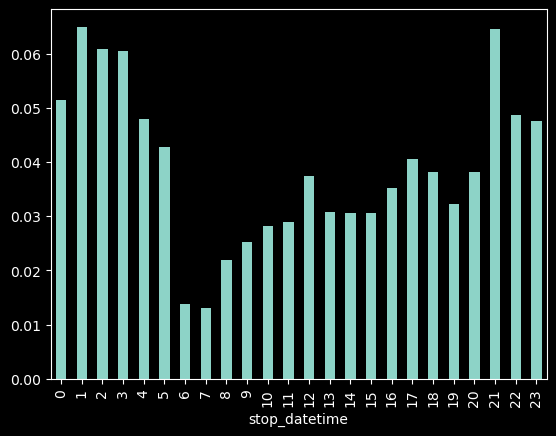

In [38]:
ri.groupby(ri.index.hour).is_arrested.mean().plot.bar()

> Wow! The arrest rate has a significant spike overnight, and then dips in the early morning hours.

## Are drug-related stops on the rise?

In [39]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()
annual_drug_rate

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

<Axes: xlabel='stop_datetime'>

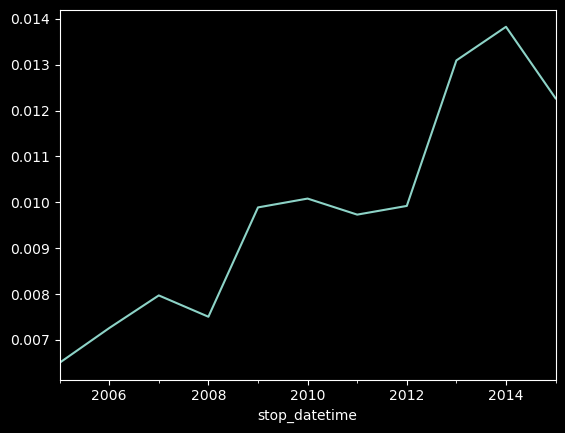

In [40]:
annual_drug_rate.plot()

> Interesting! The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

In [41]:
annual_search_rate = ri.search_conducted.resample('A').mean()

<Axes: xlabel='stop_datetime'>

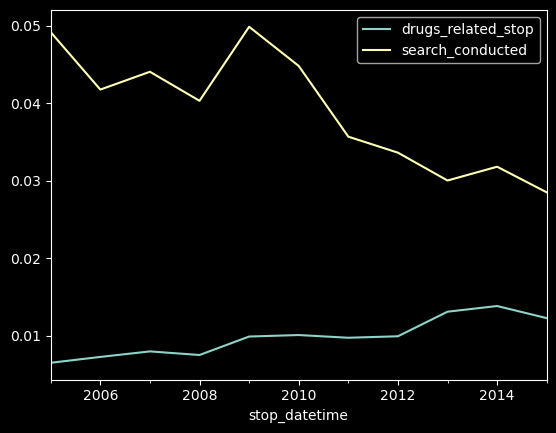

In [42]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
annual.plot()

> Wow! The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

## What violations are caught in each district?

In [43]:
all_zones = pd.crosstab(ri.district, ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


<Axes: xlabel='district'>

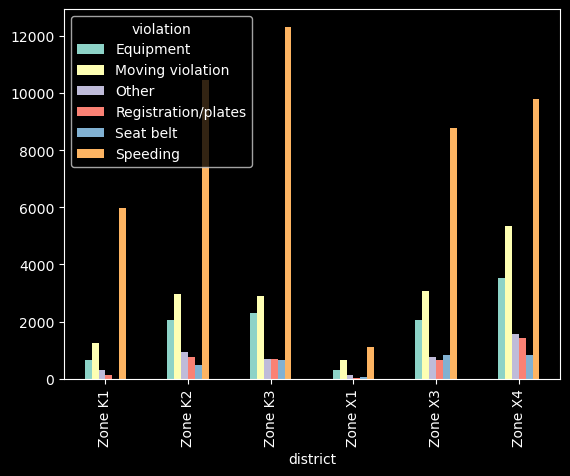

In [44]:
all_zones.plot(kind='bar')

<Axes: xlabel='district'>

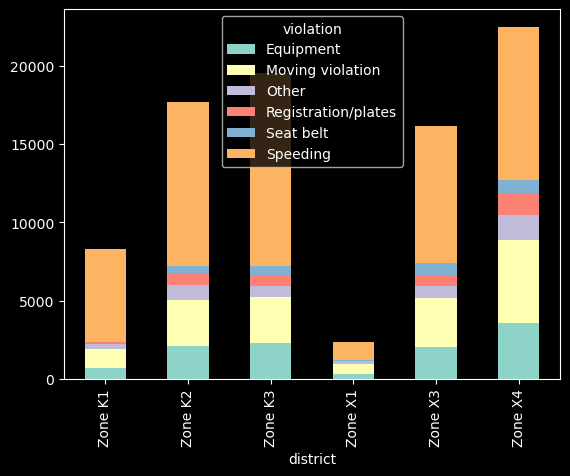

In [45]:
all_zones.plot(kind='bar', stacked=True)

> Interesting! The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

## How long might you be stopped for a violation?

In [46]:
ri.stop_duration.value_counts()

0-15 Min     69577
16-30 Min    13740
30+ Min       3219
Name: stop_duration, dtype: int64

In [47]:
ri['stop_minutes'] = ri.stop_duration.map({'0-15 Min':8, '16-30 Min':23, '30+ Min': 45})
ri.stop_minutes.value_counts()

8     69577
23    13740
45     3219
Name: stop_minutes, dtype: int64

In [48]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

<Axes: ylabel='violation_raw'>

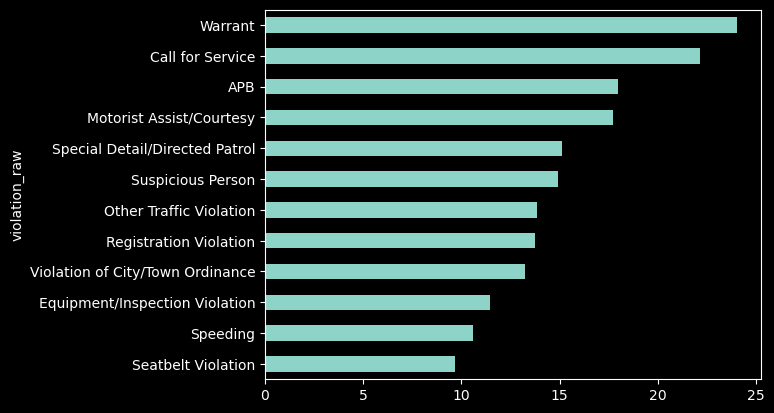

In [49]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

# Analyzing the effect of weather on policing

## Exploring the weather dataset

In [50]:
weather = pd.read_csv('weather.zip')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

* 3 columns related to temperature
* 2 columns related to wind
    * AWND is the DAILY average wind speed in miles per hour
    * WSF2 is the fastest wind speed during ANY 2-MINUTES period
* 20 columns related to certain bad weather conditions

In [51]:
weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


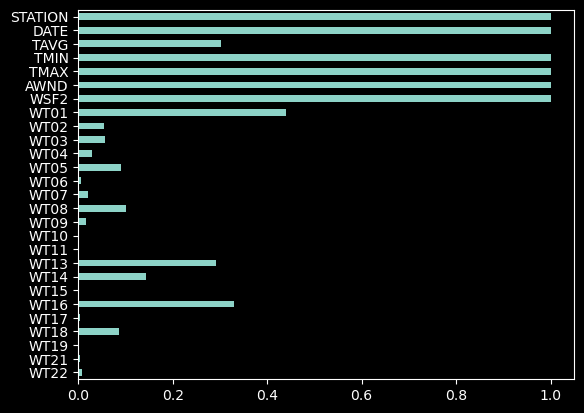

In [52]:
weather.notnull().mean().plot(kind='barh').invert_yaxis()

In [53]:
weather.describe()

,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
count,1217.000000,4017.000000,4017.000000,4017.000000,4017.000000,1767.0,221.0,224.0,117.0,360.0,...,1.0,1175.0,575.0,6.0,1326.0,12.0,345.0,4.0,18.0,32.0
mean,52.493016,43.484441,61.268608,8.593707,19.274782,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,17.830714,17.020298,18.199517,3.364601,5.623866,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.000000,-5.000000,15.000000,0.220000,4.900000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,39.000000,30.000000,47.000000,6.260000,15.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,54.000000,44.000000,62.000000,8.050000,17.900000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,68.000000,58.000000,77.000000,10.290000,21.900000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,86.000000,77.000000,102.000000,26.840000,48.100000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [54]:
weather.STATION.value_counts()

USW00014765    4017
Name: STATION, dtype: int64

In [55]:
weather = weather.drop('STATION', axis='columns')

### Winds

In [56]:
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather[['AWND', 'WSF2', 'WDIFF']].describe()

,AWND,WSF2,WDIFF
count,4017.000000,4017.000000,4017.000000
mean,8.593707,19.274782,10.681075
std,3.364601,5.623866,3.482058
min,0.220000,4.900000,2.430000
25%,6.260000,15.000000,8.490000
50%,8.050000,17.900000,10.070000
75%,10.290000,21.900000,12.290000
max,26.840000,48.100000,39.820000


<Axes: >

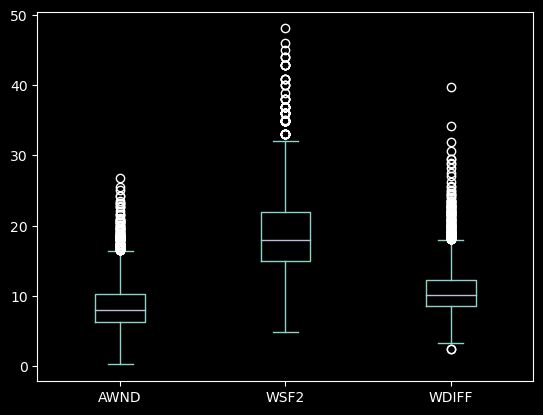

In [57]:
weather[['AWND', 'WSF2', 'WDIFF']].plot(kind='box')

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

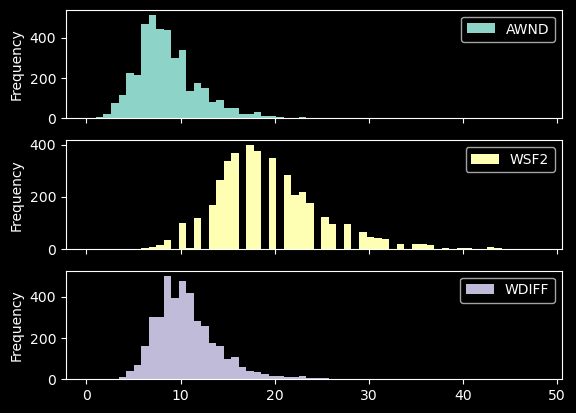

In [58]:
weather[['AWND', 'WSF2', 'WDIFF']].plot(kind='hist', bins=60, subplots=True)

### Temperatures

In [59]:
weather['TDIFF'] = weather.TMAX - weather.TMIN
weather[['TMIN', 'TAVG', 'TMAX', 'TDIFF']].describe()

,TMIN,TAVG,TMAX,TDIFF
count,4017.000000,1217.000000,4017.000000,4017.000000
mean,43.484441,52.493016,61.268608,17.784167
std,17.020298,17.830714,18.199517,6.350720
min,-5.000000,6.000000,15.000000,2.000000
25%,30.000000,39.000000,47.000000,14.000000
50%,44.000000,54.000000,62.000000,18.000000
75%,58.000000,68.000000,77.000000,22.000000
max,77.000000,86.000000,102.000000,43.000000


<Axes: >

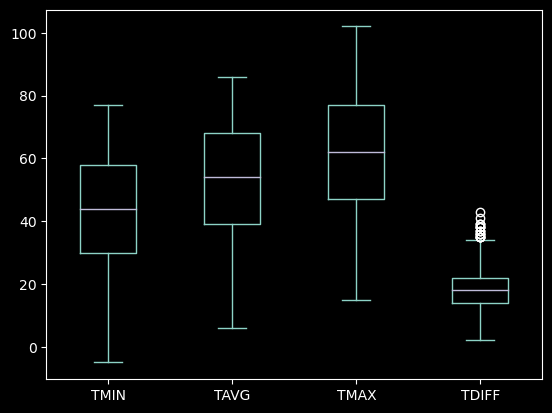

In [60]:
weather[['TMIN', 'TAVG', 'TMAX', 'TDIFF']].plot(kind='box')

> Nice job! The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

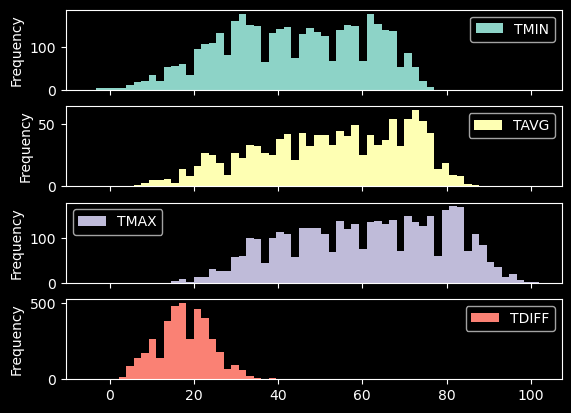

In [61]:
weather[['TMIN', 'TAVG', 'TMAX', 'TDIFF']].plot(kind='hist', bins=60, subplots=True)

> Great work! The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

## Categorizing the weather conditions

<Axes: ylabel='Frequency'>

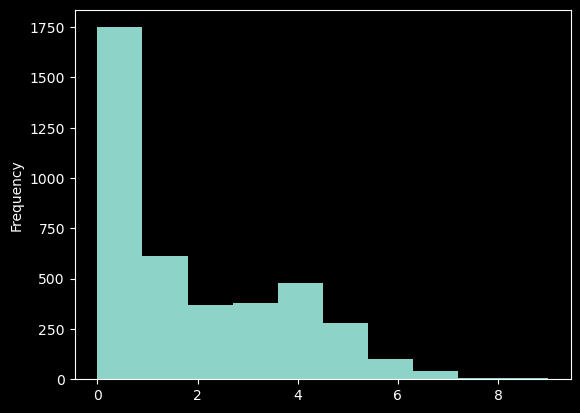

In [62]:
WT = weather.loc[:,'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
weather.bad_conditions.plot(kind='hist')

> Excellent work! It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

In [63]:
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [64]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}
weather['rating'] = weather.bad_conditions.map(mapping)
weather.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [65]:
cats = ['good', 'bad', 'worse']
#weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)
weather['rating'] = pd.Categorical(weather.rating, ordered=True, categories=cats)
weather.rating

0        bad
1        bad
2        bad
3        bad
4        bad
        ... 
4012     bad
4013    good
4014     bad
4015     bad
4016     bad
Name: rating, Length: 4017, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

## Merging Datasets

In [66]:
ri = ri.reset_index()
ri

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86531,2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,False,8
86532,2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
86533,2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8
86534,2015-12-31 22:09:00,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,False,8


In [67]:
weather_rating = weather[['DATE', 'rating']]
weather_rating

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad
...,...,...
4012,2015-12-27,bad
4013,2015-12-28,good
4014,2015-12-29,bad
4015,2015-12-30,bad


In [68]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [69]:
ri_weather = ri_weather.set_index('stop_datetime')

## Does weather affect the arrest rate?

In [70]:
ri_weather.is_arrested.mean()

0.0355690117407784

In [71]:
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [72]:
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
arrest_rate

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

> Wow! The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

<Axes: xlabel='violation'>

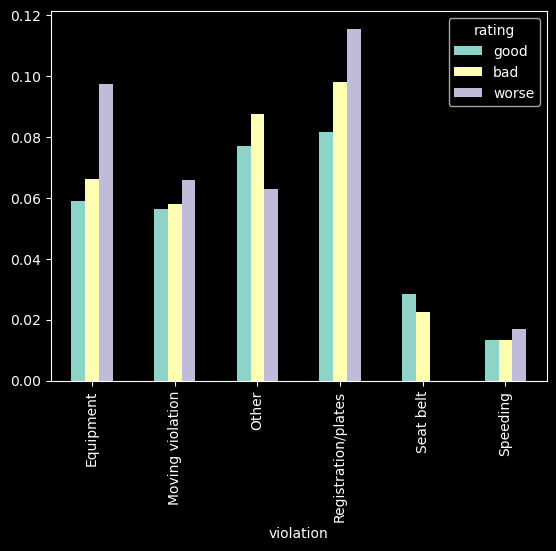

In [73]:
arrest_rate.unstack().plot(kind='bar')

In [74]:
print(arrest_rate.loc['Moving violation','bad'])

0.05804964058049641


In [75]:
print(arrest_rate.loc['Speeding'])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [76]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


In [77]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886
